In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [117]:
# Load the dataset
df = pd.read_csv('data.csv')

In [118]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [119]:
# Drop the "Unnamed" column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [120]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [121]:
# Step 2: Check for duplicates
# df.duplicated().sum()

duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)

Number of duplicate rows:  0


In [122]:
# Step 4: Descriptive statistics for numerical columns
print("\nDescriptive statistics:")
df.describe()


Descriptive statistics:


,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [124]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [125]:
'''
When dealing with categorical data like EthnicGroup or TestPrep, 
the mode is the most suitable imputation method because it reflects the most common category and preserves the distribution of the data. 
This ensures that the imputed values align with the existing patterns, which is crucial for maintaining data integrity. 
Additionally, using advanced imputation methods or removing rows was not chosen to avoid overcomplicating the process or losing valuable data, 
especially since the missing values were manageable in proportion.
'''

'\nWhen dealing with categorical data like EthnicGroup or TestPrep, \nthe mode is the most suitable imputation method because it reflects the most common category and preserves the distribution of the data. \nThis ensures that the imputed values align with the existing patterns, which is crucial for maintaining data integrity. \nAdditionally, using advanced imputation methods or removing rows was not chosen to avoid overcomplicating the process or losing valuable data, \nespecially since the missing values were manageable in proportion.\n'

In [126]:
# Mode imputation for categorical columns
categorical_columns = [
    'EthnicGroup', 'ParentEduc', 'TestPrep', 
    'ParentMaritalStatus', 'PracticeSport', 
    'IsFirstChild', 'TransportMeans', 'WklyStudyHours'
]
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Get the most frequent value
    df[col] = df[col].fillna(mode_value)  # Direct assignment instead of inplace

In [127]:
# Median imputation for 'NrSiblings' column

# median is ideal for NrSiblings because it mitigates the effect of extreme values and 
# better represents the typical family size in real-world scenarios.
median_value = df['NrSiblings'].median()
df['NrSiblings'] = df['NrSiblings'].fillna(median_value)

In [128]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [129]:
# Exclude specific columns
excluded_columns = ['MathScore', 'ReadingScore', 'WritingScore']

# Display unique values for remaining columns
for col in df.columns:
    if col not in excluded_columns:
        unique_values = df[col].unique()
        print(f"Column: {col}")
        print(f"Unique Values ({len(unique_values)}): {unique_values}\n")

Column: Gender
Unique Values (2): ['female' 'male']

Column: EthnicGroup
Unique Values (5): ['group C' 'group B' 'group A' 'group D' 'group E']

Column: ParentEduc
Unique Values (6): ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Column: LunchType
Unique Values (2): ['standard' 'free/reduced']

Column: TestPrep
Unique Values (2): ['none' 'completed']

Column: ParentMaritalStatus
Unique Values (4): ['married' 'single' 'widowed' 'divorced']

Column: PracticeSport
Unique Values (3): ['regularly' 'sometimes' 'never']

Column: IsFirstChild
Unique Values (2): ['yes' 'no']

Column: NrSiblings
Unique Values (8): [3. 0. 4. 1. 2. 5. 7. 6.]

Column: TransportMeans
Unique Values (2): ['school_bus' 'private']

Column: WklyStudyHours
Unique Values (3): ['< 5' '5 - 10' '> 10']



In [130]:
# Univariate Analysis -

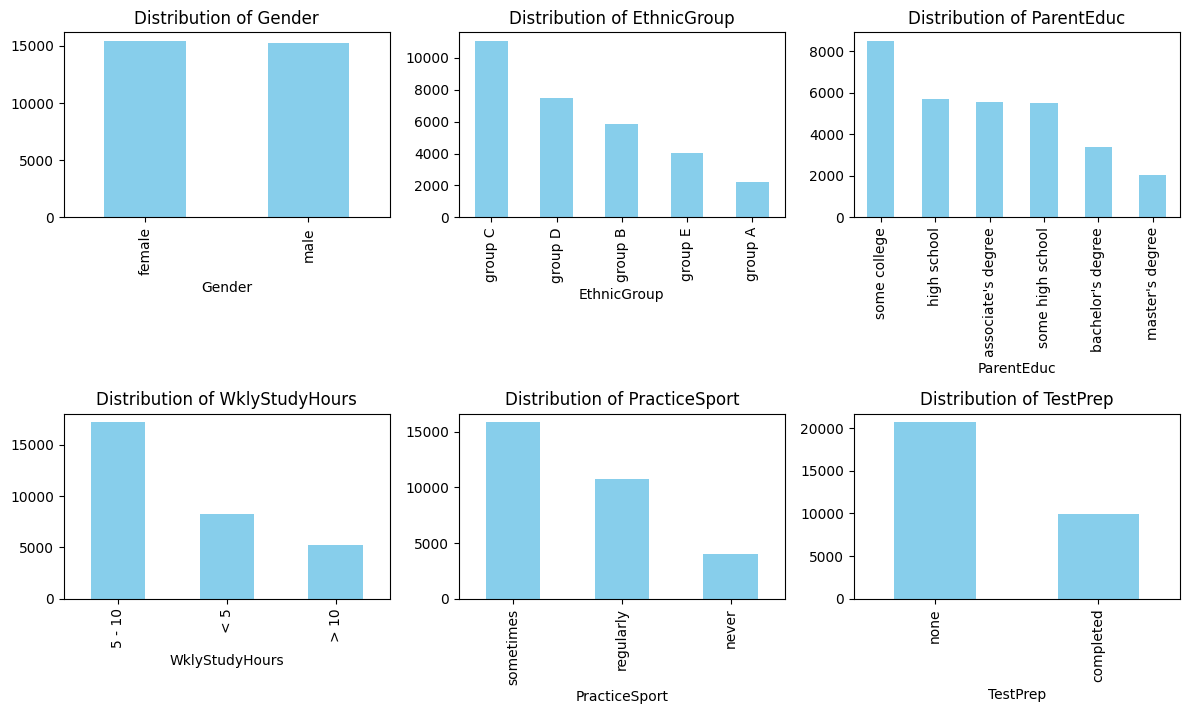

In [131]:
import matplotlib.pyplot as plt

# Create a figure and subplots (3 rows, 3 columns)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))  

columns = ['Gender', 'EthnicGroup', 'ParentEduc', 
           'WklyStudyHours', 'PracticeSport', 'TestPrep']

# Flatten the axs array to iterate correctly
axs = axs.flat  

for i, col in enumerate(columns):
    df[col].value_counts().plot(kind='bar', ax=axs[i], color="skyblue")
    axs[i].set_title(f"Distribution of {col}")

# Hide empty subplots if any
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])  # Remove unused subplots

# Adjust layout
plt.tight_layout()
plt.show()


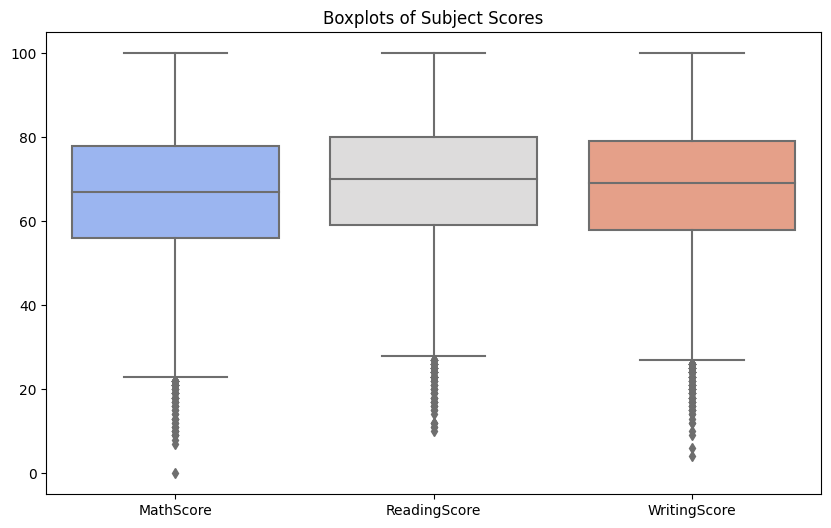

In [132]:
# Boxplots for Subject Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["MathScore", "ReadingScore", "WritingScore"]], palette="coolwarm")
plt.title("Boxplots of Subject Scores")
plt.show()

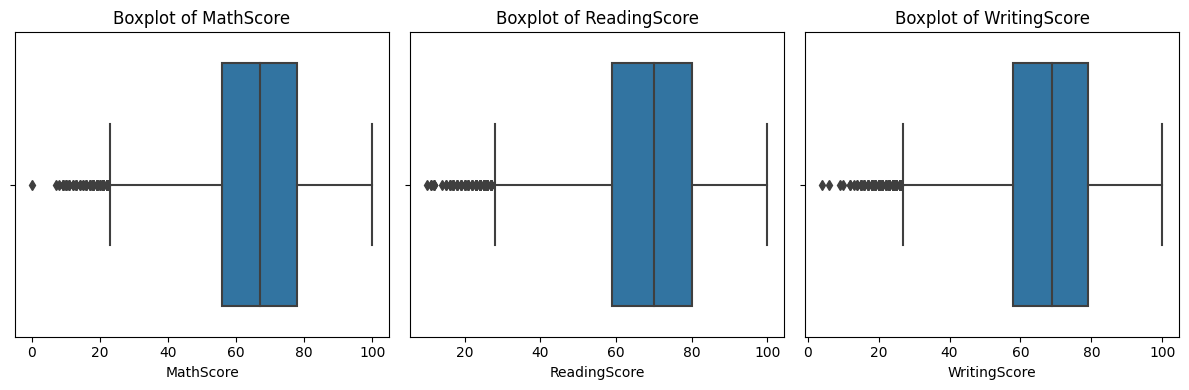

In [133]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Iterate over the columns and create the box plots
columns = ['MathScore', 'ReadingScore', 'WritingScore']
for i, col in enumerate(columns):
    ax = axs[i]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()

In [134]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2219
LunchType              2219
TestPrep               2219
ParentMaritalStatus    2219
PracticeSport          2219
IsFirstChild           2219
NrSiblings             2219
TransportMeans         2219
WklyStudyHours         2219
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

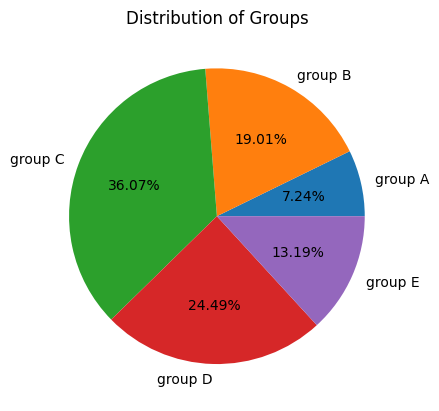

In [135]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
groupB=df.loc[(df['EthnicGroup']=="group B")].count()
groupC=df.loc[(df['EthnicGroup']=="group C")].count()
groupD=df.loc[(df['EthnicGroup']=="group D")].count()
groupE=df.loc[(df['EthnicGroup']=="group E")].count()

l=["group A", "group B","group C","group D","group E"]
mlist=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.title("Distribution of Groups")
plt.pie(mlist, labels = l, autopct='%1.2f%%')
plt.show

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.445978     69.189667     68.456711
some high school    62.584013     65.510785     63.632409


<function matplotlib.pyplot.show(close=None, block=None)>

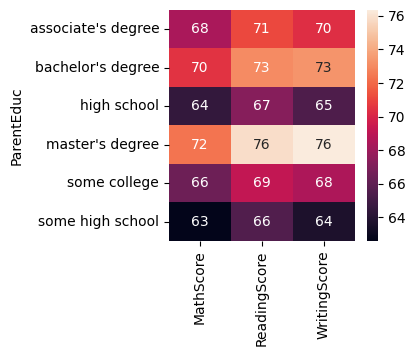

In [136]:
gb=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)
plt.figure(figsize=(3,3))
sns.heatmap(gb, annot=True)
plt.show

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.650161     69.379561     68.406177
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


<function matplotlib.pyplot.show(close=None, block=None)>

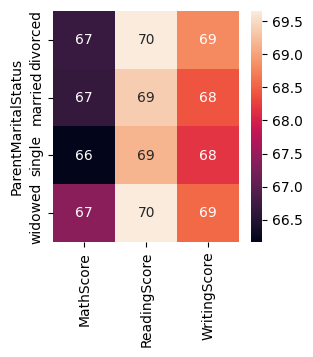

In [137]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)
plt.figure(figsize=(3,3))
sns.heatmap(gb1, annot=True)
plt.show

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.859078     69.654148     68.643800
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


<function matplotlib.pyplot.show(close=None, block=None)>

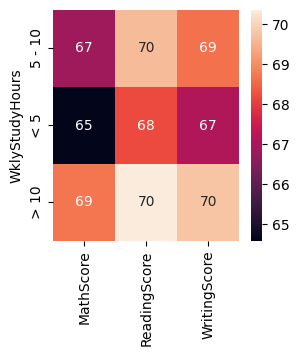

In [138]:
gb2=df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb2)
plt.figure(figsize=(3,3))
sns.heatmap(gb2, annot=True)
plt.show

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.289258     69.255112     68.090255


<function matplotlib.pyplot.show(close=None, block=None)>

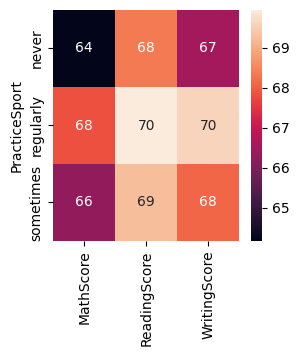

In [139]:
gb3=df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb3)
plt.figure(figsize=(3,3))
sns.heatmap(gb3, annot=True)
plt.show

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed  69.546660     73.732998     74.703265
none       65.120323     67.281495     65.394180


<function matplotlib.pyplot.show(close=None, block=None)>

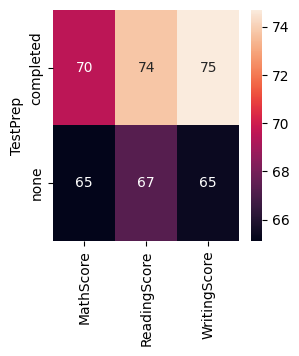

In [140]:
gb3=df.groupby("TestPrep").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb3)
plt.figure(figsize=(3,3))
sns.heatmap(gb3, annot=True)
plt.show

In [141]:
# bivariate analysis

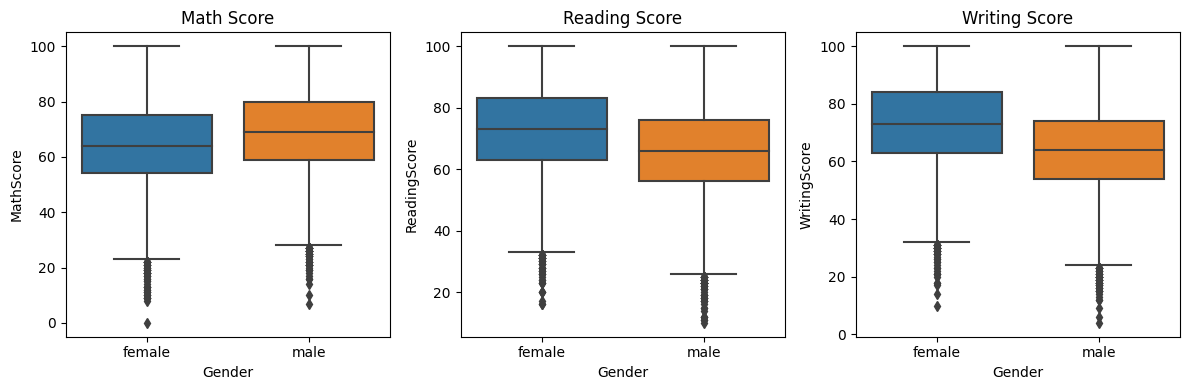

In [142]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by Gender
sns.boxplot(ax=axs[0], x='Gender', y='MathScore', data=df)
axs[0].set_title('Math Score')

# Box plot of ReadingScore by Gender
sns.boxplot(ax=axs[1], x='Gender', y='ReadingScore', data=df)
axs[1].set_title('Reading Score')

# Box plot of WritingScore by Gender
sns.boxplot(ax=axs[2], x='Gender', y='WritingScore', data=df)
axs[2].set_title('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

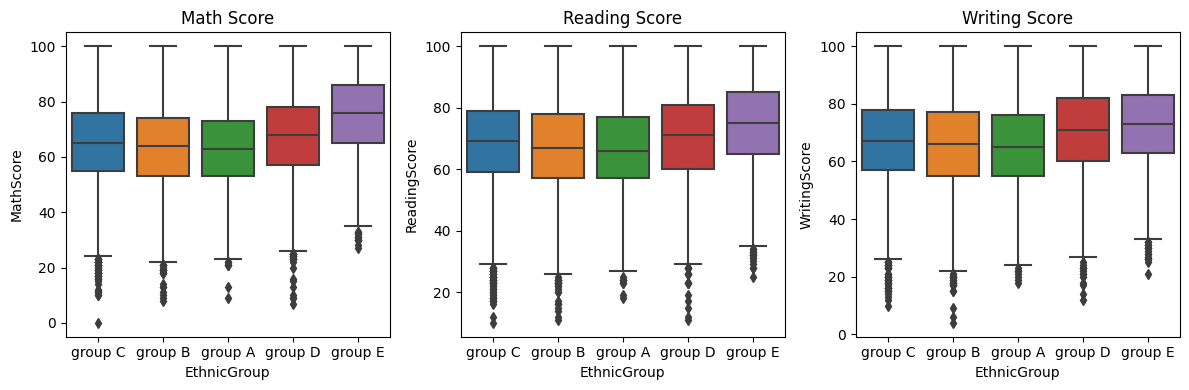

In [143]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by EthnicGroup
sns.boxplot(ax=axs[0], x='EthnicGroup', y='MathScore', data=df)
axs[0].set_title('Math Score')

# Box plot of ReadingScore by EthnicGroup
sns.boxplot(ax=axs[1], x='EthnicGroup', y='ReadingScore', data=df)
axs[1].set_title('Reading Score')

# Box plot of WritingScore by EthnicGroup
sns.boxplot(ax=axs[2], x='EthnicGroup', y='WritingScore', data=df)
axs[2].set_title('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

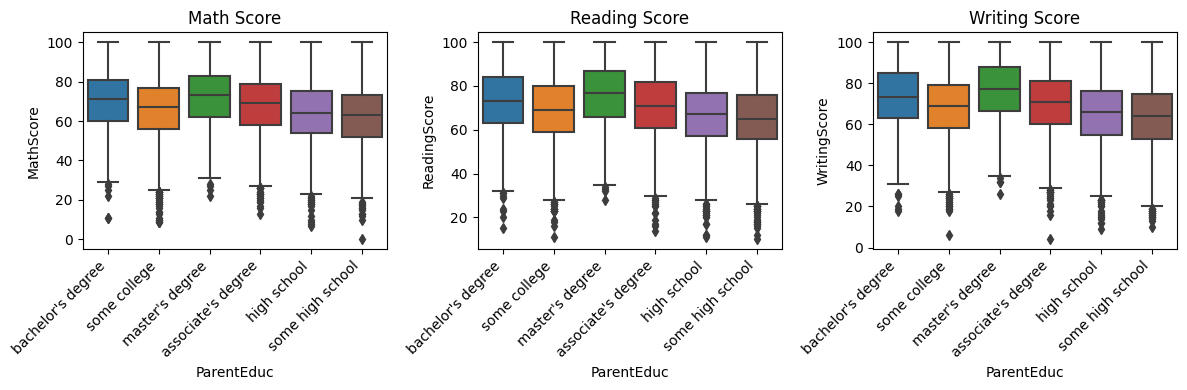

In [144]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by ParentEduc
sns.boxplot(ax=axs[0], x='ParentEduc', y='MathScore', data=df)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by ParentEduc
sns.boxplot(ax=axs[1], x='ParentEduc', y='ReadingScore', data=df)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by ParentEduc
sns.boxplot(ax=axs[2], x='ParentEduc', y='WritingScore', data=df)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

In [145]:
# Multivariae=te Analysis -

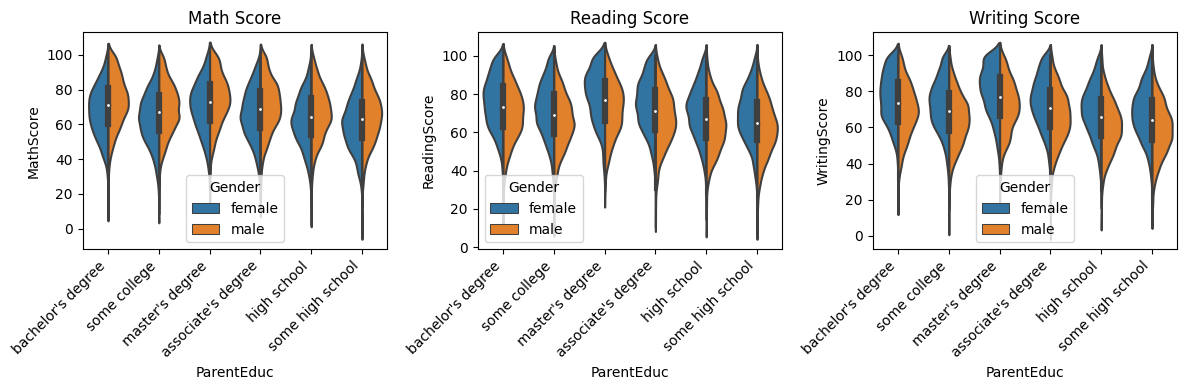

In [146]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Violin plot of MathScore by ParentEduc and Gender
sns.violinplot(ax=axs[0], x='ParentEduc', y='MathScore', hue='Gender', split=True, data=df)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Violin plot of ReadingScore by ParentEduc and Gender
sns.violinplot(ax=axs[1], x='ParentEduc', y='ReadingScore', hue='Gender', split=True, data=df)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Violin plot of WritingScore by ParentEduc and Gender
sns.violinplot(ax=axs[2], x='ParentEduc', y='WritingScore', hue='Gender', split=True, data=df)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()

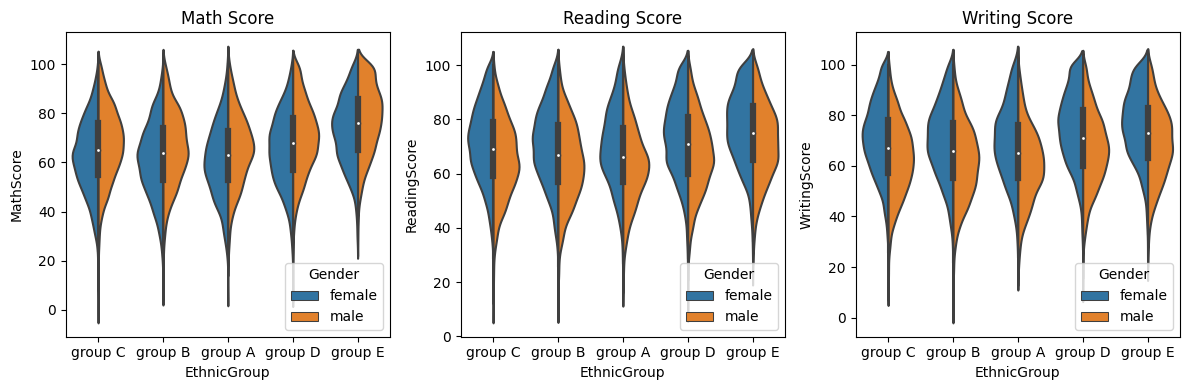

In [147]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Violin plot of MathScore by EthnicGroup and Gender
sns.violinplot(ax=axs[0], x='EthnicGroup', y='MathScore', hue='Gender', split=True, data=df)
axs[0].set_title('Math Score')

# Violin plot of ReadingScore by EthnicGroup and Gender
sns.violinplot(ax=axs[1], x='EthnicGroup', y='ReadingScore', hue='Gender', split=True, data=df)
axs[1].set_title('Reading Score')

# Violin plot of WritingScore by EthnicGroup and Gender
sns.violinplot(ax=axs[2], x='EthnicGroup', y='WritingScore', hue='Gender', split=True, data=df)
axs[2].set_title('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()

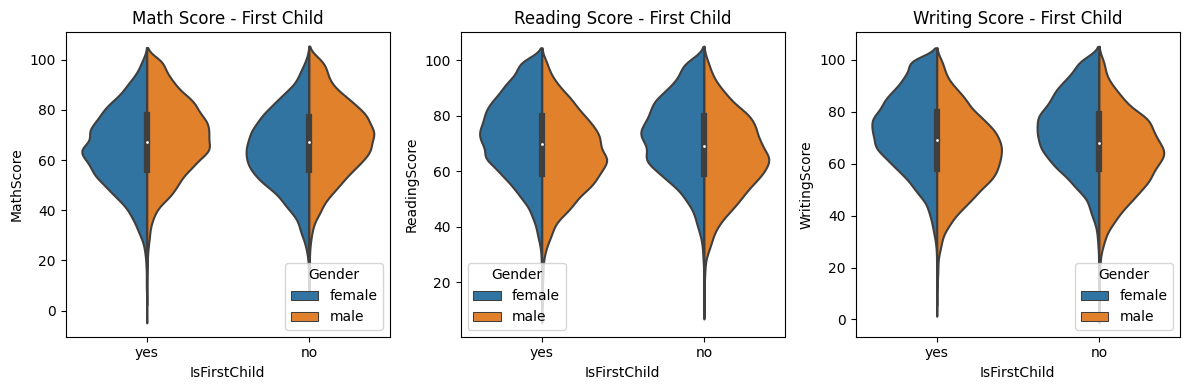

In [148]:
# Create a figure and three subplots for First Child vs Non-First Child
fig2, axs2 = plt.subplots(1, 3, figsize=(12, 4))

# Violin plot of MathScore by IsFirstChild and Gender
sns.violinplot(ax=axs2[0], x='IsFirstChild', y='MathScore', hue='Gender', data=df, split=True)
axs2[0].set_title('Math Score - First Child')

# Violin plot of ReadingScore by IsFirstChild and Gender
sns.violinplot(ax=axs2[1], x='IsFirstChild', y='ReadingScore', hue='Gender', data=df, split=True)
axs2[1].set_title('Reading Score - First Child')

# Violin plot of WritingScore by IsFirstChild and Gender
sns.violinplot(ax=axs2[2], x='IsFirstChild', y='WritingScore', hue='Gender', data=df, split=True)
axs2[2].set_title('Writing Score - First Child')

# Adjust the spacing between subplots for First Child vs Non-First Child
plt.tight_layout()

# Display the merged graph
plt.show()

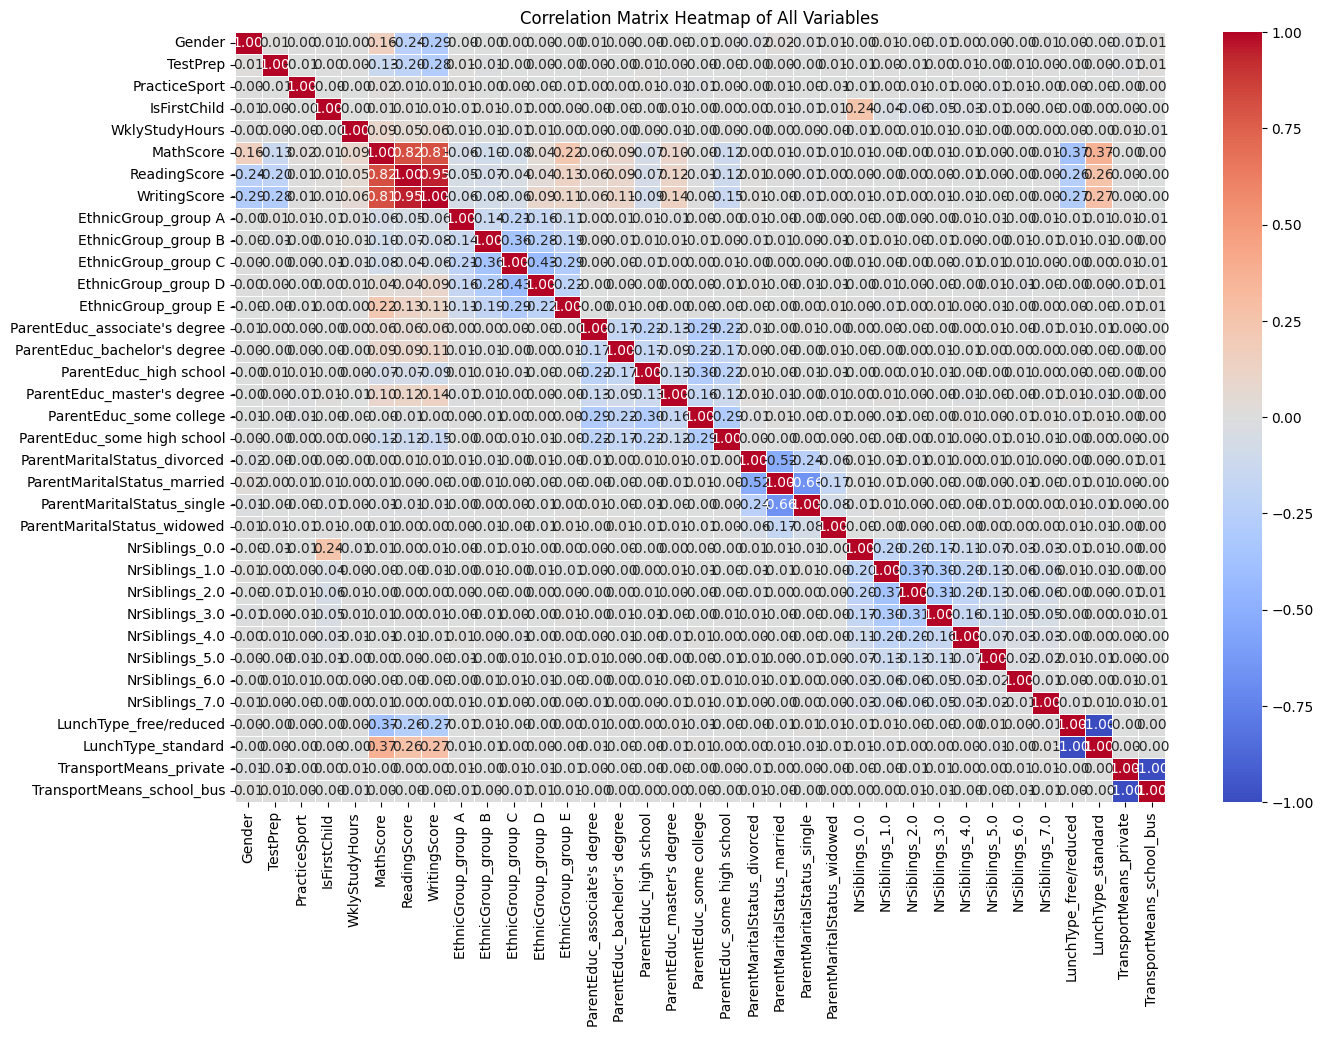

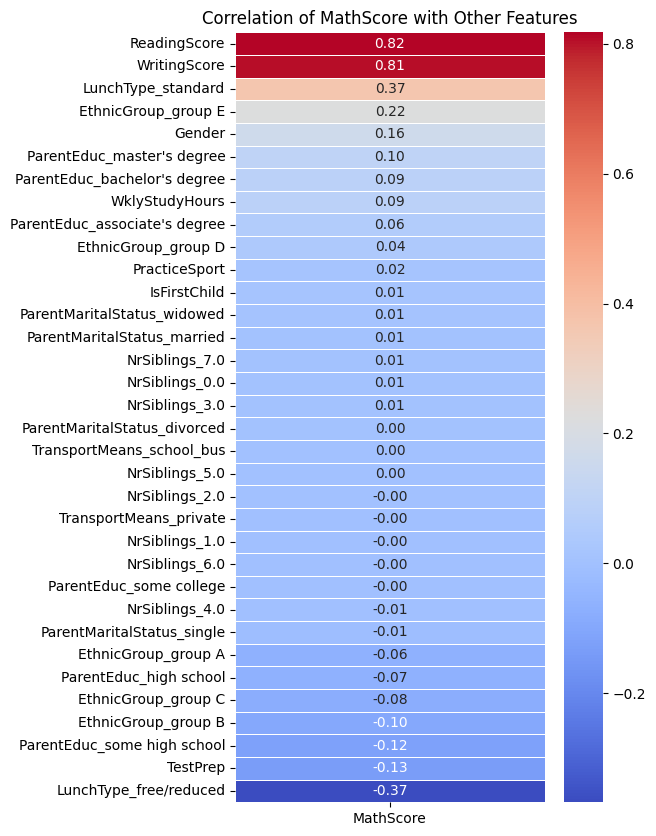

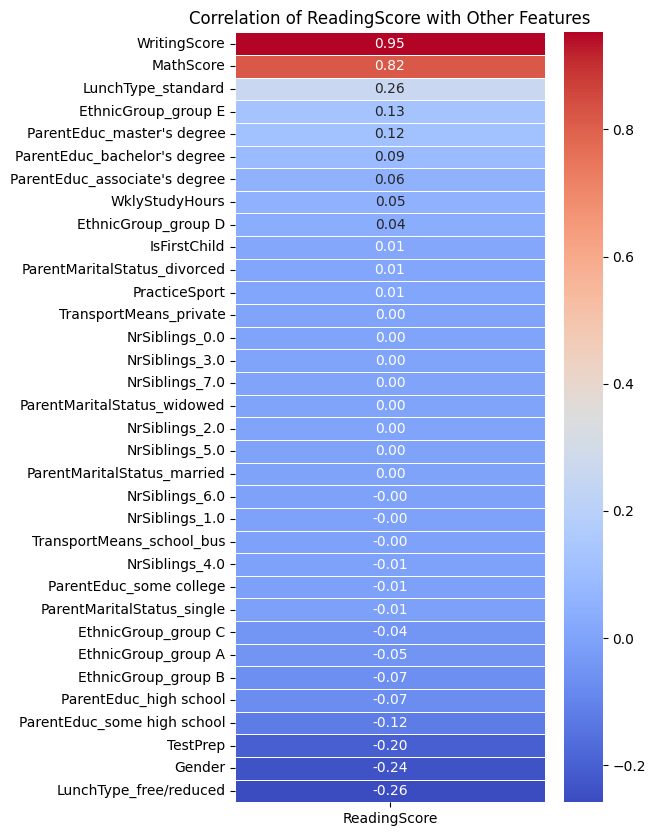

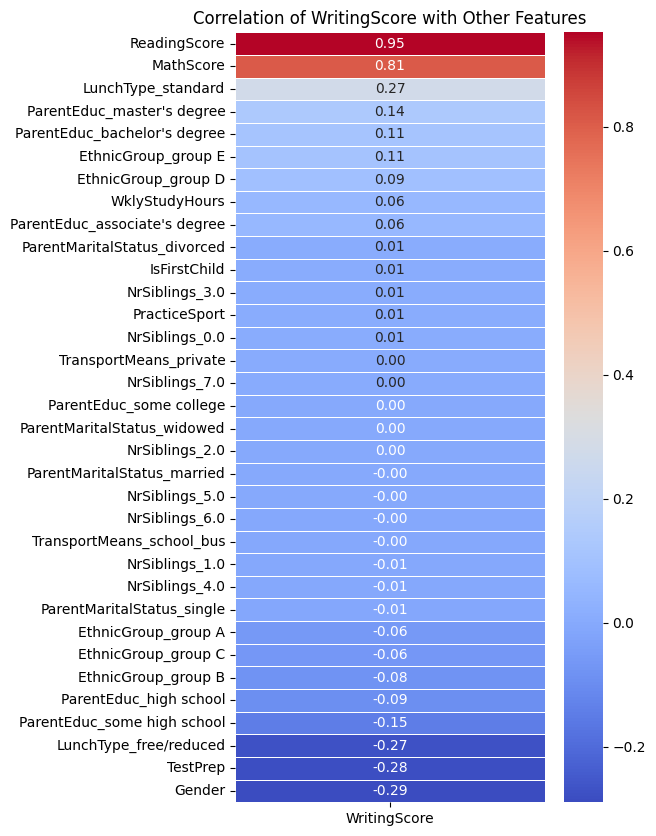

In [149]:
# Step 1: Make a copy of the DataFrame
df_encoded = df.copy()

# Step 2: Label Encoding for Binary Categorical Features
binary_cols = ['Gender', 'PracticeSport', 'TestPrep', 'IsFirstChild']
for col in binary_cols:
    if col in df_encoded.columns:  # Ensure column exists before encoding
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Step 3: Ordinal Encoding for 'WklyStudyHours'
if 'WklyStudyHours' in df_encoded.columns:
    study_hours_mapping = {'< 5': 0, '5 - 10': 1, '> 10': 2}
    df_encoded['WklyStudyHours'] = df_encoded['WklyStudyHours'].map(study_hours_mapping)

# Step 4: One-Hot Encoding for Multi-Class Categorical Features
categorical_cols = ['EthnicGroup', 'ParentEduc', 'ParentMaritalStatus', 'NrSiblings', 'LunchType', 'TransportMeans']
df_encoded = pd.get_dummies(df_encoded, columns=[col for col in categorical_cols if col in df_encoded.columns])

# Step 5: Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# 📌 **Graph 1: Overall Correlation Heatmap**
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap of All Variables")
plt.show()

# 📌 **Graphs 2, 3, 4: Correlation of Each Subject Score with Other Features**
subject_scores = ['MathScore', 'ReadingScore', 'WritingScore']

for score_column in subject_scores:
    if score_column in correlation_matrix.columns:
        # Extract correlations of the target column with other variables
        target_corr = correlation_matrix[score_column].drop(score_column).sort_values(ascending=False)

        # 📌 **Graph for each subject score**
        plt.figure(figsize=(5, 10))
        sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=0.5)
        plt.title(f'Correlation of {score_column} with Other Features')
        plt.show()
    else:
        print(f"Warning: {score_column} not found in correlation matrix.")


Results:

All three scores (MathScore, ReadingScore, and WritingScore) are highly correlated with each other. This is expected as students who do well in one subject often tend to do well in others. It suggests that common factors like overall study habits, intelligence, or the quality of their education are influencing all three scores.

TestPrep has a positive correlation with all three scores. This suggests that students who took a test preparation course tend to have higher scores. The strongest correlation is with the WritingScore.

The LunchType shows a significant correlation with all three scores, with students having a standard lunch tending to score higher. This could be a proxy for socio-economic status.

The EthnicGroup has varied correlations with the scores. Group E tends to have a positive correlation, especially with MathScore, indicating that this group tends to have higher scores. On the other hand, Group B and C show a negative correlation with the scores, indicating that these groups tend to have lower scores.

Parent education level (ParentEduc) also shows a correlation with the scores. Specifically, students whose parents have a Master's degree tend to have higher scores. In contrast, students whose parents only finished High school tend to have lower scores. This could be another proxy for socio-economic status or it could be that higher-educated parents are better able to support their children's education.

Gender also plays a role, with female students tending to score higher in Reading and Writing while male students score higher in Math. This is consistent with common gender stereotypes.

Discussion:

The analysis reveals some interesting insights, but also raises further questions. For example, how can we close the apparent performance gap between different ethnic groups or between students of parents with different education levels? What can we do to help students with free/reduced lunch to improve their scores? Why are male students scoring lower in Reading and Writing and what can be done to improve their performance?

It's also important to note that correlation does not imply causation. For example, while it's tempting to conclude that doing test prep causes higher scores, it could also be that more motivated students or students with more resources are both more likely to do test prep and to score higher.

Further analysis could involve exploring these correlations in more detail, looking for potential causal relationships, and using machine learning algorithms to predict scores based on the other attributes.

# Aggregating the score to create grades

In [150]:
# add a new column called 'Overall_Score' to put the overall score for each student
df['Overall_Score'] = ((df['MathScore'] + df['ReadingScore'] + df['WritingScore']) / 3).round(2)


# Assuming you have the following grading scale:
# A: 90-100, B: 80-89, C: 70-79, D: 60-69, F: 0-59
def assign_grade(score):
    if 90 <= score <= 100:
        return 'A'
    elif 80 <= score < 90:
        return 'B'
    elif 70 <= score < 80:
        return 'C'
    elif 60 <= score < 70:
        return 'D'
    else:
        return 'F'
# add a new column called 'Grades' that contains students grades
df['Grades'] = df['Overall_Score'].apply(assign_grade)

In [151]:
# Drop the 'LunchType' column because it will not provide an insight for us
df.drop(columns=['LunchType'], inplace=True)

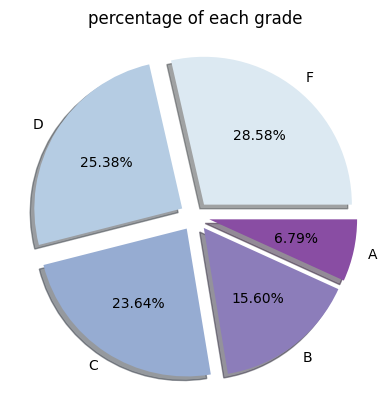

In [152]:
# Count the percentage of each grade
grade_counts = df['Grades'].value_counts()
grade_counts.plot(kind='pie', autopct='%0.2f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1], labels=grade_counts.index, shadow=True, colors=sns.color_palette("BuPu"))
plt.title('percentage of each grade')
plt.ylabel('')
plt.show()

From the above plot, we conclude that the majority of students have failed their exams. Therefore, this school may consider administering more challenging exams."

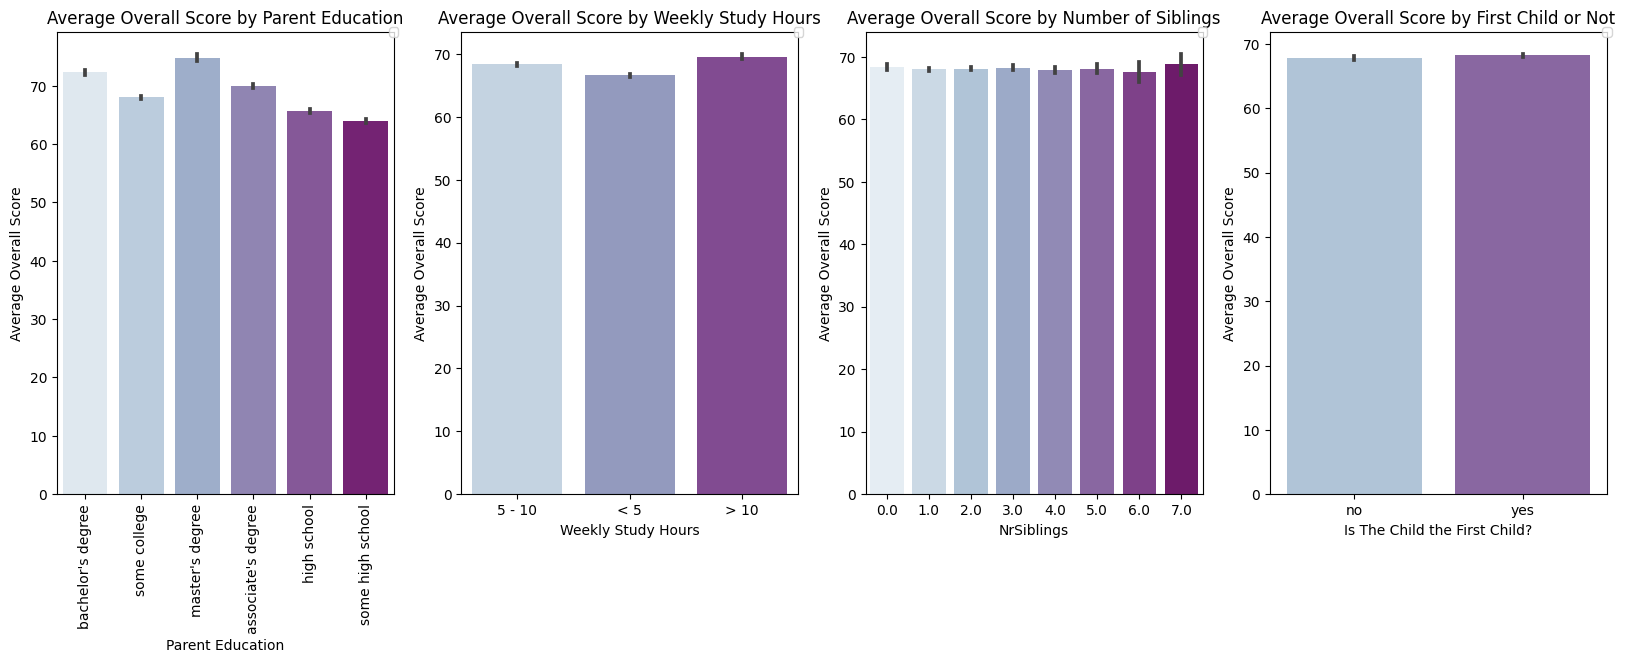

In [153]:
# Create a 1x4 grid for the plots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # Adjusted figsize for better spacing

# Plot 1: Bar plot for parent education vs. average overall score
sns.barplot(data=df, x='ParentEduc', y='Overall_Score', palette="BuPu", estimator='mean', ax=axes[0])
axes[0].set_xlabel('Parent Education')
axes[0].set_ylabel('Average Overall Score')
axes[0].set_title('Average Overall Score by Parent Education')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')


# Plot 2: Bar plot for weekly study hours vs. average overall score
df_sorted = df.sort_values(by='WklyStudyHours')
sns.barplot(data=df_sorted, x='WklyStudyHours', y='Overall_Score', palette="BuPu", ax=axes[1])
axes[1].set_xlabel('Weekly Study Hours')
axes[1].set_ylabel('Average Overall Score')
axes[1].set_title('Average Overall Score by Weekly Study Hours')
axes[1].legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')


# Plot 3: Bar plot for number of siblings vs. average overall score
df_sorted = df.sort_values(by='NrSiblings')
sns.barplot(data=df_sorted, x='NrSiblings', y='Overall_Score', palette="BuPu", ax=axes[2])
axes[2].set_xlabel('NrSiblings')
axes[2].set_ylabel('Average Overall Score')
axes[2].set_title('Average Overall Score by Number of Siblings')
axes[2].legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')


# Plot 4: Bar plot for IsFirstChild vs. average overall score
df_sorted = df.sort_values(by='IsFirstChild')
sns.barplot(data=df_sorted, x='IsFirstChild', y='Overall_Score', palette="BuPu", ax=axes[3])
axes[3].set_xlabel('Is The Child the First Child?')
axes[3].set_ylabel('Average Overall Score')
axes[3].set_title('Average Overall Score by First Child or Not')
axes[3].legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')


plt.show()


**From the above plots, we can draw four conclusions:**

**1. Parental education has an impact on the child's educational status.**

**2. The more hours a student studies, the higher their grades tend to be.**

**3. Number of siblings of a students doesn't affect to there grades**

**4. If the student is first child or not it doesn't matter**

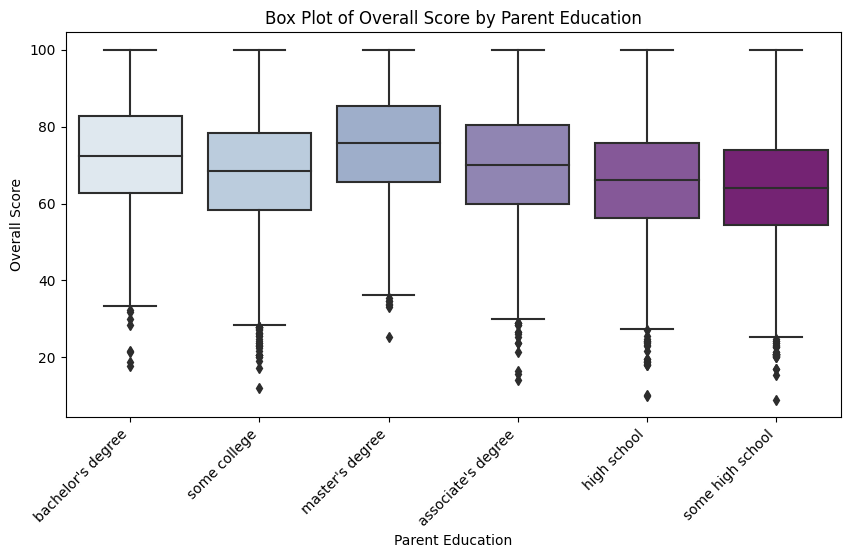

In [154]:
# Create a box plot for Parent Education vs. Overall Score
plt.figure(figsize=(10, 5))
sns.boxplot(x='ParentEduc', y='Overall_Score', data=df, palette="BuPu")
plt.xlabel('Parent Education')
plt.ylabel('Overall Score')
plt.title('Box Plot of Overall Score by Parent Education')
plt.xticks(rotation=45, ha='right')
plt.show()

**from the above box plot we conclude that the data provided seems to have an lower outliers, which is not good**

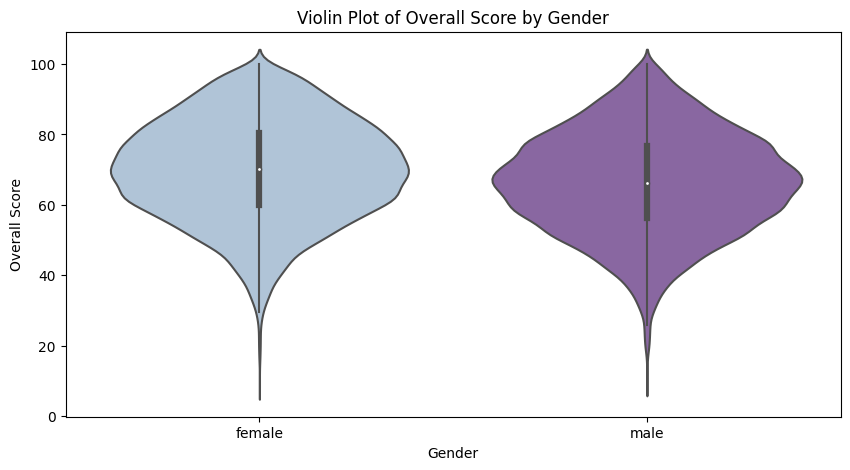

In [155]:
# Create a violin plot for Overall Score vs. Gender
plt.figure(figsize=(10, 5))
sns.violinplot(x='Gender', y='Overall_Score', data=df, palette="BuPu")
plt.xlabel('Gender') 
plt.ylabel('Overall Score')
plt.title('Violin Plot of Overall Score by Gender')
plt.show()

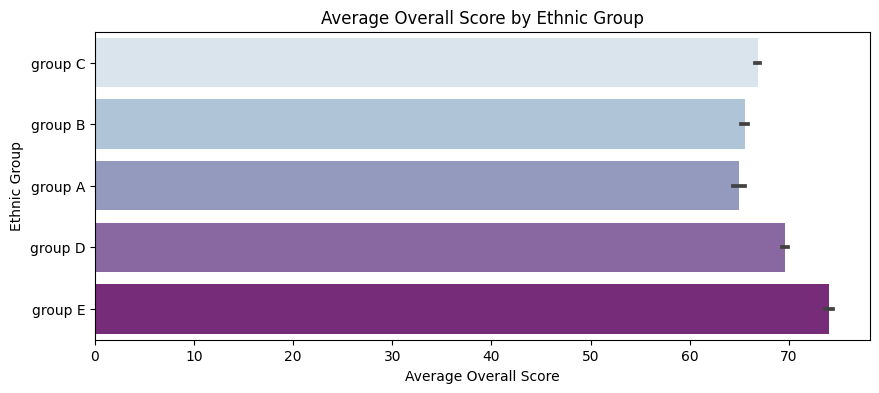

In [156]:
# Create a bar plot for Overall Score by Ethnic Group
plt.figure(figsize=(10, 4))
sns.barplot(y='EthnicGroup', x='Overall_Score', data=df, palette="BuPu", estimator='mean')
plt.ylabel('Ethnic Group')
plt.xlabel('Average Overall Score')
plt.title('Average Overall Score by Ethnic Group')
plt.show()

**From the above visual we conclude that group E students always has the highest overall grades.**

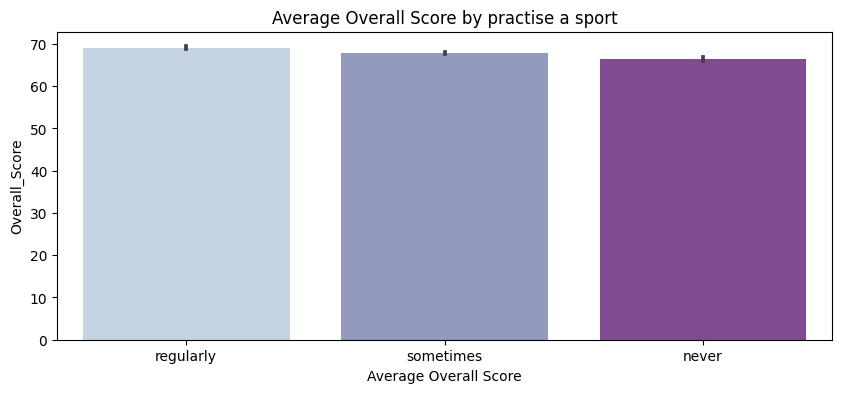

In [157]:
# Create a bar plot for Overall Score by Ethnic Group
plt.figure(figsize=(10, 4))
sns.barplot(x='PracticeSport', y='Overall_Score', data=df, palette="BuPu", estimator='mean')
plt.xlabel('is the student practise a sport?')
plt.xlabel('Average Overall Score')
plt.title('Average Overall Score by practise a sport')
plt.show()

**From the above visual we can conclude that the students that practising a specific sport regularly has the highest grades**

# ------------------------------------------ END ---------------------------------------------